# Preparation: importing libraries and loading data

In [3]:
import pandas as pd
data = pd.read_csv('main_task.xlt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [24]:
type(data['Cuisine Style'][0])

str

In [33]:
data[data.City == 'Lyon']

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
33,id_2434,Lyon,['Vietnamese'],2435.0,3.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187265-d3543959-Reviews-Vi...,d3543959
56,id_1585,Lyon,['Italian'],1586.0,4.0,$$ - $$$,25.0,[['Too busy and too important to serve custom....,/Restaurant_Review-g187265-d4295258-Reviews-Es...,d4295258
90,id_499,Lyon,NaN,500.0,4.5,NaN,45.0,"[['Excellent crepes and cosy place'], ['10/14/...",/Restaurant_Review-g187265-d7623654-Reviews-Cr...,d7623654
103,id_197,Lyon,"['French', 'European']",198.0,4.0,$$ - $$$,370.0,"[['Lovely place to eat', 'Good food, but lacks...",/Restaurant_Review-g187265-d918784-Reviews-L_A...,d918784
105,id_1940,Lyon,"['European', 'French', 'Seafood']",1941.0,3.0,$$ - $$$,354.0,"[['Standard', 'Rather good and great ornament'...",/Restaurant_Review-g1166685-d1324029-Reviews-A...,d1324029
...,...,...,...,...,...,...,...,...,...,...
39817,id_1231,Lyon,"['Latin', 'Bar', 'Spanish', 'Pub', 'Wine Bar',...",1232.0,4.0,$$ - $$$,22.0,"[['Nice place . Good atmosphere.', 'So good we...",/Restaurant_Review-g187265-d9841543-Reviews-Ma...,d9841543
39835,id_1051,Lyon,['French'],1052.0,4.0,$$ - $$$,122.0,"[['Average overpriced brunch', 'Charming but l...",/Restaurant_Review-g187265-d1322748-Reviews-Le...,d1322748
39843,id_1659,Lyon,NaN,1660.0,3.5,NaN,25.0,"[['Easy to veganize !'], ['05/31/2017']]",/Restaurant_Review-g187265-d11932831-Reviews-F...,d11932831
39981,id_924,Lyon,NaN,925.0,4.0,NaN,29.0,"[[], []]",/Restaurant_Review-g187265-d5850306-Reviews-Re...,d5850306


In [25]:
data.head(3)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели (copied from SF)

In [26]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = data.drop(['Restaurant_id', 'Rating'], axis = 1)
y = data['Rating']

In [85]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [28]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# СОЗДАНИЕ, ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ МОДЕЛИ (copied from SF)

In [87]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [5]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

NameError: name 'X_train' is not defined

In [6]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

NameError: name 'y_test' is not defined

In [35]:
clean_data = data.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis = 1)

In [37]:
clean_data.corr()

,Ranking,Rating,Number of Reviews
Ranking,1.000000,-0.368371,-0.222670
Rating,-0.368371,1.000000,0.030964
Number of Reviews,-0.222670,0.030964,1.000000


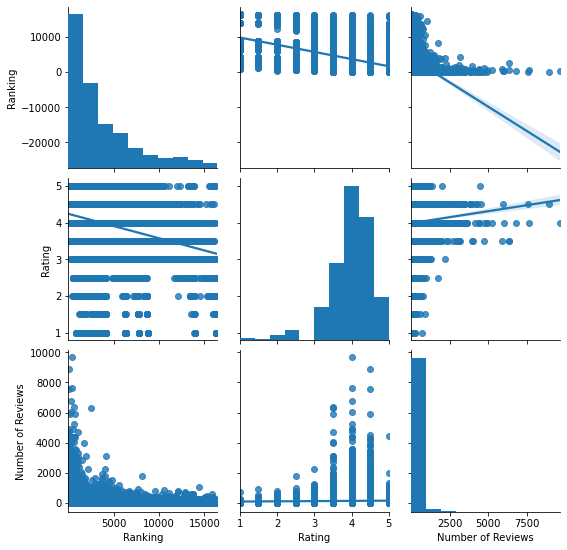

In [38]:
import seaborn as sns
sns.pairplot(clean_data, kind = 'reg')

In [46]:
# no records with no reviews:
clean_data[clean_data['Number of Reviews'] == 0]

,Ranking,Rating,Number of Reviews


In [47]:
clean_data['Number of Reviews'].fillna(0, inplace = True)

In [49]:
clean_data.corr()

,Ranking,Rating,Number of Reviews
Ranking,1.000000,-0.368371,-0.222072
Rating,-0.368371,1.000000,0.026924
Number of Reviews,-0.222072,0.026924,1.000000


In [51]:
X_cl = clean_data.drop(['Rating'], axis = 1)
y_cl = clean_data['Rating']
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X_cl, y_cl, test_size=0.25)

In [52]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [53]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.4291780027777778


In [7]:
data['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [8]:
data[data['Price Range'] == '$$ - $$$'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18412 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      18412 non-null  object 
 1   City               18412 non-null  object 
 2   Cuisine Style      18412 non-null  object 
 3   Ranking            18412 non-null  float64
 4   Rating             18412 non-null  float64
 5   Price Range        18412 non-null  object 
 6   Number of Reviews  18197 non-null  float64
 7   Reviews            18412 non-null  object 
 8   URL_TA             18412 non-null  object 
 9   ID_TA              18412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.5+ MB


In [9]:
len(data['City'].unique())

31

In [60]:
data.groupby(by = 'Price Range').Rating.describe()

,count,mean,std,min,25%,50%,75%,max
Price Range,,,,,,,,
$,6279.0,4.092371,0.620983,1.0,4.0,4.0,4.5,5.0
$$ - $$$,18412.0,3.987427,0.545240,1.0,3.5,4.0,4.5,5.0
$$$$,1423.0,4.204849,0.481395,1.0,4.0,4.5,4.5,5.0


In [10]:
data[data['Price Range'].isna()].Rating.describe()

count    13886.000000
mean         3.933854
std          0.825939
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [11]:
# create numerical column to capture Price Range information
nbPriceRange = [2]*40000
i = 0
for elem in data['Price Range']:
    if elem == '$':
        nbPriceRange[i] = 1
    elif elem == '$$$$':
        nbPriceRange[i] = 3
    i += 1
data['PriceRangeNb'] = nbPriceRange

In [12]:
# code to help answering questions on cuisins
import numpy as np
cuisinesCount = {}
nbStyles = []
for elem in data['Cuisine Style']:
    if elem != elem:
        nbStyles.append(1)
    else:
        listTmp = elem[1:-1].split(", ")
        nbStyles.append(len(listTmp))
        for style in listTmp:
            if style in cuisinesCount: 
                cuisinesCount[style] += 1
            else:
                cuisinesCount[style] = 1
        
print(len(cuisinesCount))
print(sum(nbStyles)/len(nbStyles))
sorted(cuisinesCount, key=cuisinesCount.get, reverse=True)[0]

125
2.6224


"'Vegetarian Friendly'"

In [13]:
# adding 3 numerical columns with 2 flags for European and Vegetarian cuisines, and number of cuisine styles
europFlag = []
vegetFlag = []
for elem in data['Cuisine Style']:
    if (elem != elem) or ("'Vegetarian Friendly'" not in elem):
        vegetFlag.append(0)
    else:
        vegetFlag.append(1)
    if (elem != elem) or ("'European'" not in elem):
        europFlag.append(0)
    else:
        europFlag.append(1)

data['isEuropean'] = europFlag
data['isVegetarian'] = vegetFlag
data['nbCuisines'] = nbStyles

In [14]:
from datetime import datetime
import re

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [107]:
# dealing with dates of reviews
dayDiff = []
day1 = [] # will be used as an additional variable to show the date of the 1st avaiable review
day2 = [] # will be used as an additional variable to show the date of the 2nd avaiable review
day1_clean = [] # will be used for an array of dates to calculate max
day2_clean = [] # will be used for an array of dates to calculate max
date_today = datetime(2019,1,2).date() # arbitrary selected date in the future relative to the review dates
for elem in data['Reviews']:
    if len(elem) < 9:
        dayDiff.append(0)
        day1.append(0)
        day2.append(0)
    else:
        match = re.findall(r'\d{2}/\d{2}/\d{4}', elem)
        date1 = datetime.strptime(match[0], '%m/%d/%Y').date()
        day1_clean.append(date1)
        day1.append(abs((date_today-date1).days))
        if len(match) < 2:
            day2.append(0)
            dayDiff.append(0)
        else:
            date2 = datetime.strptime(match[1], '%m/%d/%Y').date()
            day2_clean.append(date2)
            dayDiff.append(abs((date2-date1).days))
            day2.append(abs((date_today-date2).days))

print(max(day2_clean),max(day1_clean), max(dayDiff))

2018-02-26 2018-02-26 3207


In [90]:
# adding new variables to the dataset
data['day1'] = day1
data['day2'] = day2
data['dayDiff'] = dayDiff
data_clean2 = data.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis = 1)
data_clean2['Number of Reviews'].fillna(0, inplace = True)
data_clean2.head()  
data_clean2.corr() 

,Ranking,Rating,Number of Reviews,PriceRangeNb,isEuropean,isVegetarian,nbCuisines,day1,day2,dayDiff
Ranking,1.000000,-0.368371,-0.222072,-0.026525,-0.279235,-0.300139,-0.320250,0.093095,0.035902,0.065661
Rating,-0.368371,1.000000,0.026924,-0.028588,0.047848,0.128356,0.120059,-0.062151,-0.056721,-0.065990
Number of Reviews,-0.222072,0.026924,1.000000,0.107162,0.212746,0.364499,0.405641,-0.074303,-0.015396,-0.086586
PriceRangeNb,-0.026525,-0.028588,0.107162,1.000000,0.096237,0.019858,0.003177,-0.033764,-0.047934,-0.039184
isEuropean,-0.279235,0.047848,0.212746,0.096237,1.000000,0.266105,0.484885,-0.043274,0.026600,-0.057261
isVegetarian,-0.300139,0.128356,0.364499,0.019858,0.266105,1.000000,0.691884,-0.098582,-0.008180,-0.113006
nbCuisines,-0.320250,0.120059,0.405641,0.003177,0.484885,0.691884,1.000000,-0.109530,0.004356,-0.117791
day1,0.093095,-0.062151,-0.074303,-0.033764,-0.043274,-0.098582,-0.109530,1.000000,0.475998,0.193205
day2,0.035902,-0.056721,-0.015396,-0.047934,0.026600,-0.008180,0.004356,0.475998,1.000000,0.720756
dayDiff,0.065661,-0.065990,-0.086586,-0.039184,-0.057261,-0.113006,-0.117791,0.193205,0.720756,1.000000


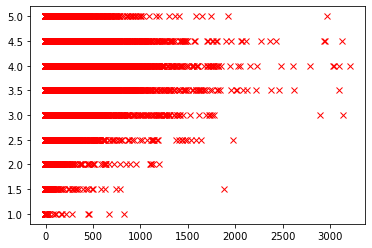

In [54]:
from matplotlib import pyplot
pyplot.plot(dayDiff,data['Rating'],'rx')

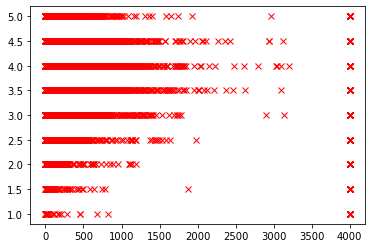

In [56]:
pyplot.plot(dayDiff,data['Rating'],'rx') 
# it was checked if it makes sense to have the dateDifference set to 4000 instead of 0 when dates are not available

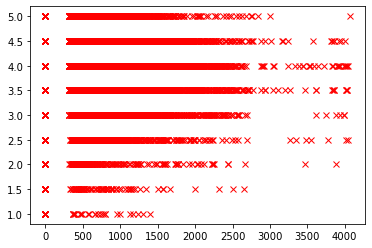

In [75]:
pyplot.plot(day2, data['Rating'],'rx')

In [104]:
X_3 = data_clean2.drop(['Rating','day2'], axis = 1)
y_3 = data_clean2['Rating']
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.25)

In [105]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [106]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.3778576892857143
